# Assignment 

1. Get the silhouette coefficient of the two cluster k-means solution. You'll notice that the silhouette coefficient will turn out to be greater than the one above where cluster number is three. We know that the Iris dataset consists of three different clusters. How do you explain that the silhouette score of the solution with the number of clusters being equal to the correct number of classes is lower than the one where the number of clusters is different from the correct number of classes?

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

from sqlalchemy import create_engine

%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics 

In [32]:
iris = datasets.load_iris()

X = iris.data
y = iris.target 

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Computing the first principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Split the data into four equally-sized samples. First we break it in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(X_std, X_pca, test_size=0.5, brandom_state=13579)

In [35]:
kmeans = KMeans(n_clusters=2, random_state=123)

kmeans.fit(X_std)
y_pred = kmeans.predict(X_std)

print(metrics.silhouette_score(X_std, y_pred, metric='euclidean'))

0.5817500491982808


Comparing 2-cluster solution and 3-cluster solution, the 3-cluster solution further devided the 2 clusters in the 2-cluster solution. Therefore, the clusters become nearer and the average distance between each datapoint and all other datapoints in the nearest othe cluster becomes smaller.  

2. In this assignment, you'll be working with the heart disease dataset from the UC Irvine Machine Learning Repository.

In [39]:
#read in data 
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heart_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

pd.options.display.max_columns=1000

heart_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [62]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
0     303 non-null float64
1     303 non-null float64
2     303 non-null float64
3     303 non-null float64
4     303 non-null float64
5     303 non-null float64
6     303 non-null float64
7     303 non-null float64
8     303 non-null float64
9     303 non-null float64
10    303 non-null float64
11    303 non-null object
12    303 non-null object
13    303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


Here, X will be your features and in y we hold the labels. If y is equal to 1, then it indicates that the corresponding patient has heart disease and if y is equal to 0, then the patient doesn't have heart disease.

1. Split the data randomly into two and apply k-means using two, three and four as the number of clusters as we did in our discussion of the consistency in this checkpoint. Assess the consistency of the solutions using visualization. Which one does seem to be the best one?

In [116]:
#preprocessing data

# change odd rows to even rows in order to devide
rows = heart_df.shape[0] - heart_df.shape[0] % 2
heart = heart_df.iloc[:rows, :]

# Define the features and the outcome
X = heart.iloc[:, :13]
y = heart.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace = '?', value = 0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1) #don't understand this line: change >0 to 1

In [117]:
#standarize features 

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#compute the first two principle components 

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

#split data into two halves

X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(X_std, 
                                                            X_pca, 
                                                            test_size=0.5, 
                                                            random_state=101)

In [118]:
# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.

ypred = pd.DataFrame()

for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

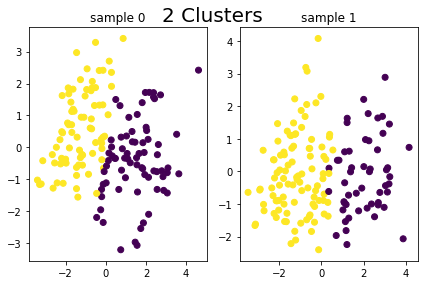

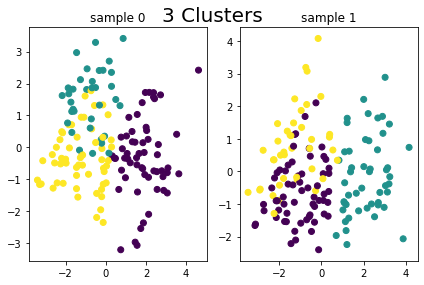

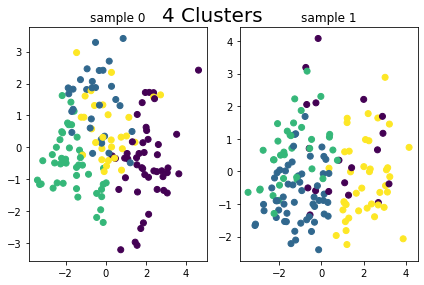

In [121]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()
    print('\n')

The 2-cluster solution is the only one showing consistency across samples. 

2. Apply k-means on the whole dataset by setting k is equal two, three and four and get ARI score for each of them. Which model is the best?

In [127]:
pred2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
pred3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
pred4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)

ari2 = metrics.adjusted_rand_score(y, pred2)
ari3 = metrics.adjusted_rand_score(y, pred3)
ari4 = metrics.adjusted_rand_score(y, pred4)


print('The ARI score for 2-cluster solution is:{}'.format(ari2))
print('The ARI score for 3-cluster solution is:{}'.format(ari3))
print('The ARI score for 4-cluster solution is:{}'.format(ari4))

The ARI score for 2-cluster solution is:0.43661540614807665
The ARI score for 3-cluster solution is:0.280694132678885
The ARI score for 4-cluster solution is:0.1968993286830863


The 2-cluster solution provides the best ARI score of 0.44. However, it indicates that the k-means clustering solution is closer to random than to perfect.

3. Apply k-means on the whole dataset by setting k is equal two, three and four and get silhouette coefficient for each of them. Which model is the best?

In [129]:
silhouette2 = metrics.silhouette_score(X_std, pred2, metric='euclidean')
silhouette3 = metrics.silhouette_score(X_std, pred3, metric='euclidean')
silhouette4 = metrics.silhouette_score(X_std, pred4, metric='euclidean')

print('The sihouette coefficient for 2-cluster solution is:{}'.format(silhouette2))
print('The sihouette coefficient for 3-cluster solution is:{}'.format(silhouette3))
print('The sihouette coefficient for 4-cluster solution is:{}'.format(silhouette4))

The sihouette coefficient for 2-cluster solution is:0.17440650461256255
The sihouette coefficient for 3-cluster solution is:0.12862190702187828
The sihouette coefficient for 4-cluster solution is:0.13186062012858554


The 2-cluster solution provides the best sihouette coefficient of 0.17. 